In [9]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# 경로를 설정하지 않으면 동작을 안할수 있음
from sklearn.tree import export_graphviz
import graphviz

# HPO를 위한 설정
from sklearn.model_selection import train_test_split, GridSearchCV

# XAI를 위한 설정
from sklearn.inspection import PartialDependenceDisplay

In [2]:
#데이터를 불러오기
wine = load_wine()

In [3]:
# 데이터프레임 생성
df = pd.DataFrame(data=wine.data, columns= wine.feature_names)
df['target'] = wine.target

In [4]:
#모형 학습
# 특성 (Feature)와 타겟(target)의 데이터를 분리
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [6]:
# HyperParameter Tunning
# GridSearch를 HyperParameter를 범위를 한정

param_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [2,3,4,5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [7]:
# HPO 및 Fitting

clf_grid = DecisionTreeClassifier( random_state= 42 )
# core
grid_search = GridSearchCV(clf_grid, param_grid, cv = 5)
# HyperParameter를 찾고, 이걸 가지고 fitting이 모두 수행
grid_search.fit(X_train, y_train)

print("Best Hyper-parameter", grid_search.best_params_)
print("Best Score", grid_search.best_score_)


Best Hyper-parameter {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score 0.9224137931034484


In [8]:
# HPO만들어진 모형의 정확도 계산 
best_model = grid_search.best_estimator_

y_pred_grid = best_model.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print('Accuracy Grid :', accuracy_grid)

Accuracy Grid : 0.9444444444444444


In [10]:
# Feature Importance를 계산
importances = best_model.feature_importances_

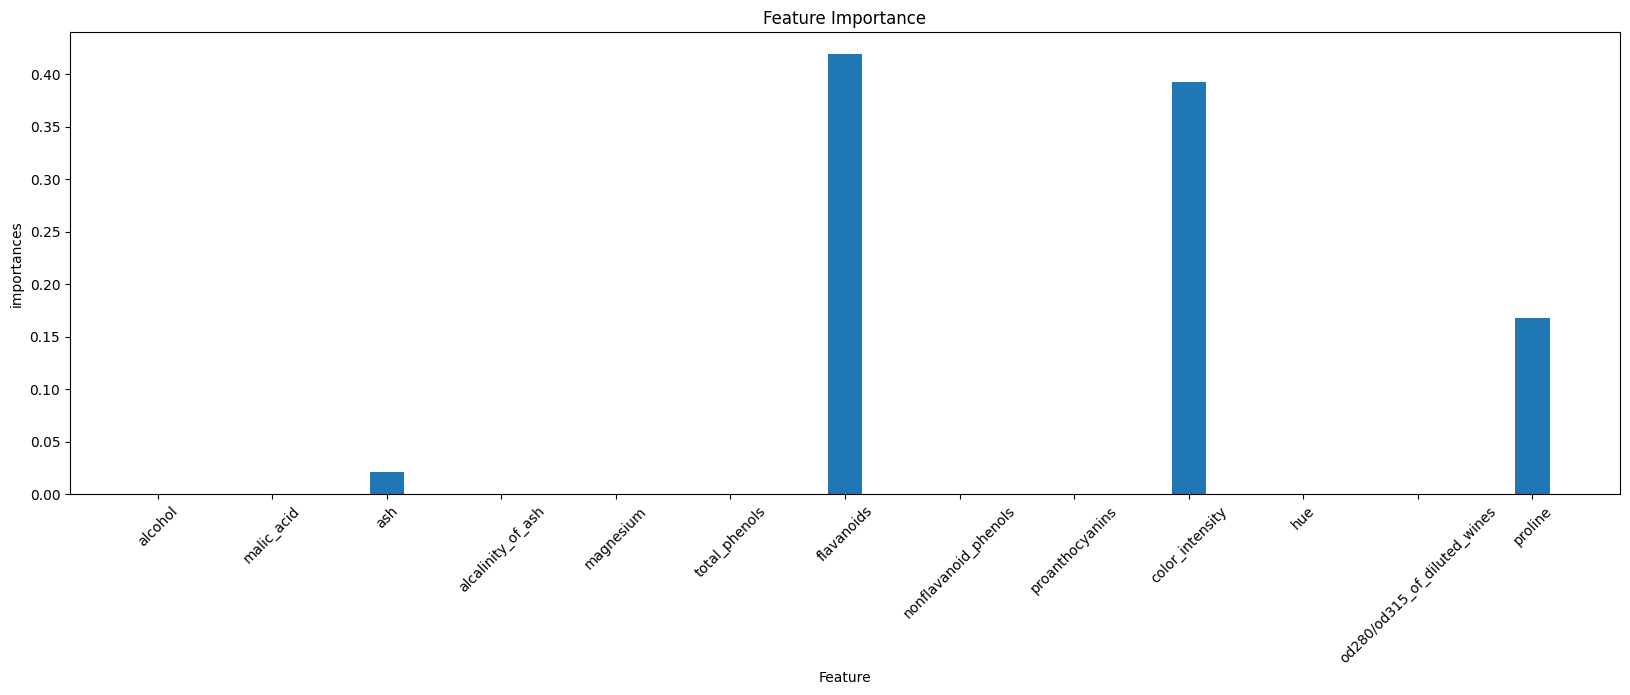

In [13]:
# Best model의 Feature Importance를  시각화
plt.figure(figsize = (20,6))
# 막대 그래프 생성
plt.bar(range(len(importances)), importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), X.columns, rotation = 45)
plt.show()

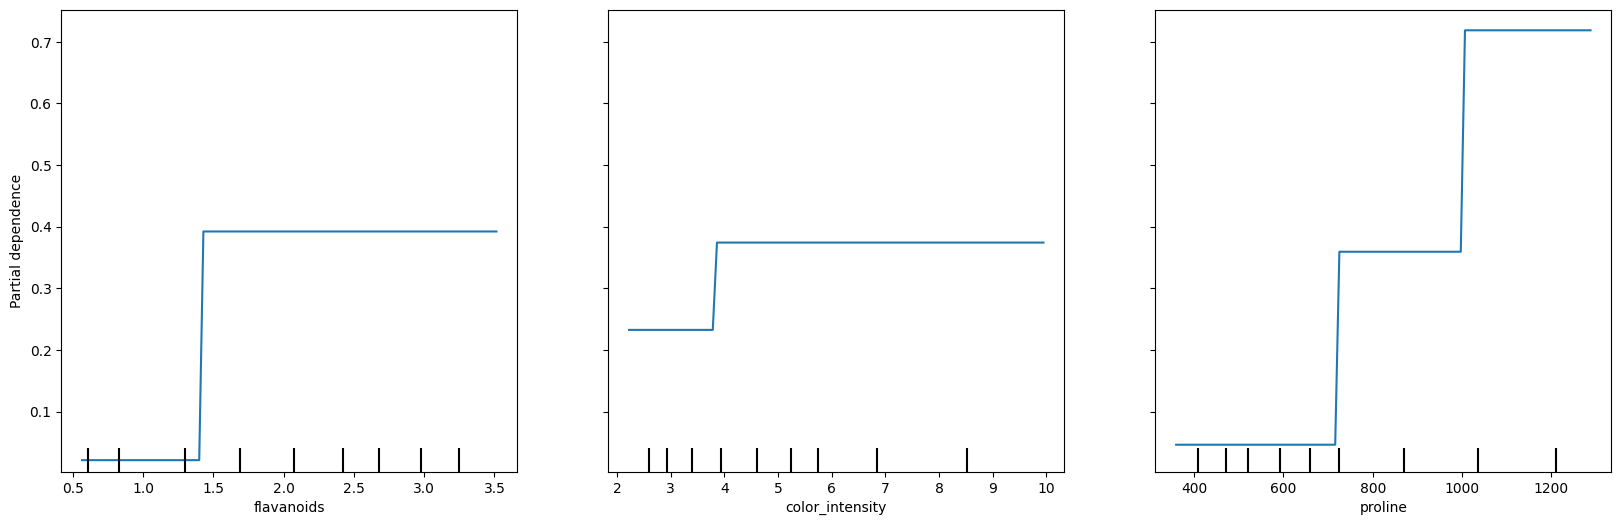

In [15]:
#Partial Dependence Plot (PDP)
# 시각화할 특성을 선택
feature = ['flavanoids', 'color_intensity', 'proline']
fig, ax = plt.subplots(figsize= (20,6))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=0, ax=ax)

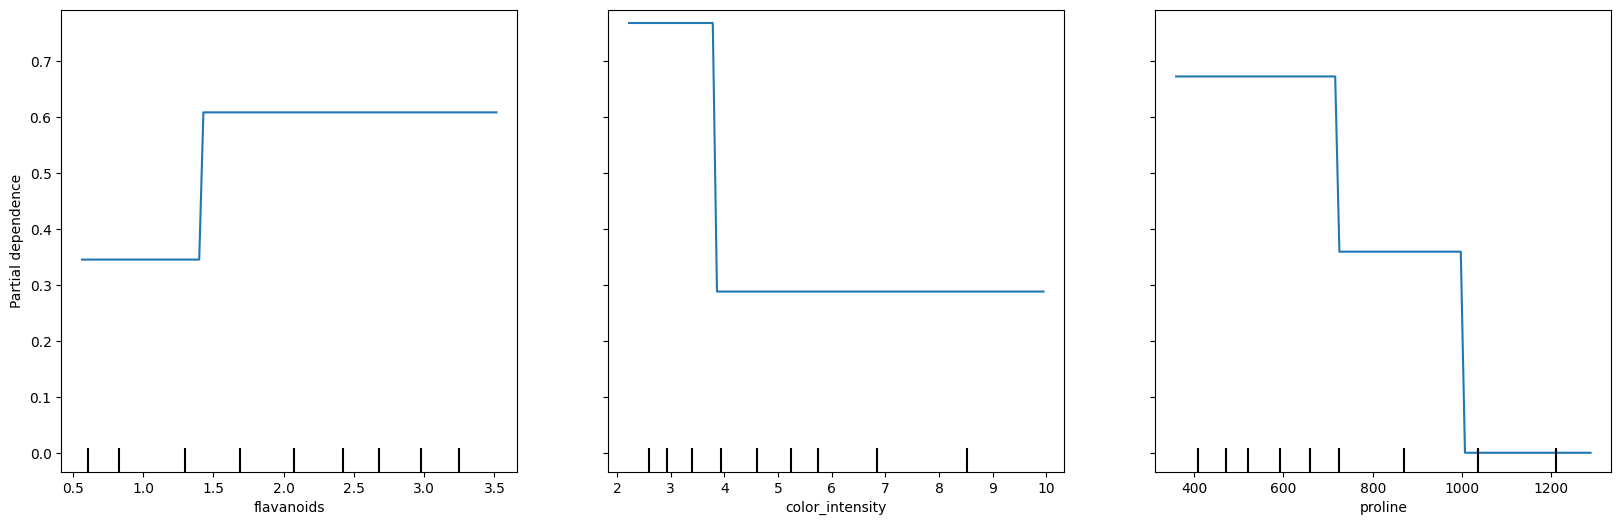

In [17]:
feature = ['flavanoids', 'color_intensity', 'proline']
fig, ax = plt.subplots(figsize= (20,6))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=1, ax=ax)

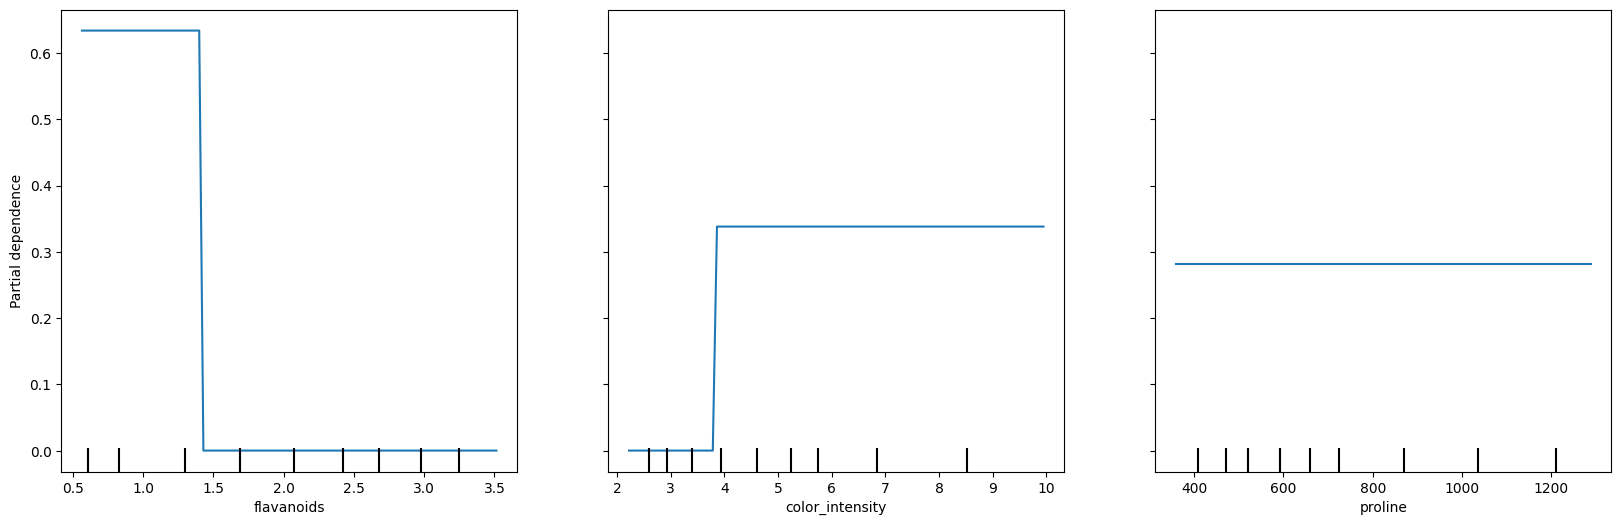

In [18]:
feature = ['flavanoids', 'color_intensity', 'proline']
fig, ax = plt.subplots(figsize= (20,6))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=2, ax=ax)